# Machine Learning Homework 2 (deadline: October 8th, 10:15)
## Regression, regularization and cross-validation

In this homework you will experiment with linear regression and see what happens when we use regularized versions of it. More precisely, you will try out Ridge and Lasso regularization. In addition, we will see how using cross-validation helps us to get more stable estimates for our performance.

Read in the data in **data.csv** and split it into training (50%) and testing (50%) set. Use random seed 0 (train_test_split method).

## Import shit

In [113]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
plt.style.use("ggplot") 

In [9]:
data = pd.read_csv("data.csv", index_col = 0)
## YOUR CODE
## Add intercept
X = data.drop('y', axis=1)
y = data[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)

## Task 1. Multivariate linear regression (1 point)

#### <font color='purple'>(a) Implement the fitting procedure of non-regularized multivariate ordinary least squares linear regression, as presented in the lecture slides (matrix operations). Fit on the training data and save the coefficients and the intercept for use in subtask (1c). Print out the coefficients corresponding to the five first features.

In [10]:
## YOUR CODE
X_train_w0 = X_train.assign(intercept = 1)
w = np.linalg.inv(X_train_w0.T.dot(X_train_w0)).dot(X_train_w0.T.dot(y_train))
intercept, coeff = w[-1], w[:-1]
print('Coefficients of five first features according to my implementation:', w[:5])

Coefficients of five first features according to my implementation: [[11.85875833]
 [ 7.7562925 ]
 [ 9.63087962]
 [ 6.99932448]
 [ 4.99498325]]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.LinearRegression` learning algorithm from the sklearn package. Fit the model on the training data and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.

In [11]:
## YOUR CODE
lr = LinearRegression().fit(X_train, y_train)
print('Coefficients of five first features according to sklearn:', lr.coef_[0][:5])

Coefficients of five first features according to sklearn: [11.85875833  7.7562925   9.63087962  6.99932448  4.99498325]


#### <font color='purple'>(c) Demonstrate that the methods of subtasks (1a) and (1b) give the same results by showing that they find the same coefficients (don't forget the intercept). </font>

You maybe won't get exactly the same results because of precision problems of floats so feel free to compare if the values are equal up to some precision (e.g. check if difference is less than 0.0000001 etc). You can use code similar to what has been given below, but you might need to change some things depending on where the intercept is in your implementation.

In [12]:
assert(abs(intercept - lr.intercept_) < 0.000001)
for i in range(99):
    assert(abs(coeff[i] - lr.coef_[0, i]) < 0.000001)

#### <font color='purple'>(d) Using the sklearn model from subtask (1b) predict the results on the training and testing set and calculate and show the root mean square errors (RMSE). Since you need to do the same evaluation in future tasks also, please implement a function 'evaluate' for this.

In [13]:
def evaluate(regression_model, trainX, trainY, testX, testY, verbose=True):
    ## YOUR CODE
    mse_tr = ((regression_model.predict(trainX) - trainY)**2).mean()
    mse_te = ((regression_model.predict(testX) - testY)**2).mean()
    
    rmse_tr = np.sqrt(mse_tr)
    rmse_te = np.sqrt(mse_te)
    
    if(verbose):
        print("\n#################\n")
        print(regression_model, '\n')
        print("RMSE train:", rmse_tr)
        print("RMSE test:", rmse_te)
    
    return rmse_tr, rmse_te

evaluate(lr, X_train, y_train, X_test, y_test)


#################

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) 

RMSE train: y    2.407999e-14
dtype: float64
RMSE test: y    7.715131
dtype: float64


(y    2.407999e-14
 dtype: float64, y    7.715131
 dtype: float64)

## Task 2. Ridge & Lambda regularized regression  (1 point)

This blogpost might clarify regularization a bit: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

#### <font color='purple'>(a) Implement the fitting procedure of ridge regression, as presented in the lecture slides (matrix operations). Fit on the training data with regularization parameter equal to 1 and save the coefficients and the intercept for use in subtask (2c). Print out the coefficients corresponding to the five first features.

In [14]:
## YOUR CODE
print(X_train_w0.shape)
reg_par = 1
w = np.linalg.inv(X_train_w0.T.dot(X_train_w0) + reg_par * np.identity(X_train_w0.shape[0])).dot(X_train_w0.T.dot(y_train))
rid_intercept, rid_coeff = w[-1], w[:-1]
print('Coefficients of five first features according to my implementation:', rid_coeff[:5])

(100, 100)
Coefficients of five first features according to my implementation: [[7.91026896]
 [7.37023604]
 [6.97156822]
 [6.03240044]
 [4.42825097]]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.Ridge` learning algorithm from the sklearn package. Fit the model on the training data with regularization parameter equal to 1 and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.</font>

Use parameters `solver = "cholesky", tol = 0.000000000001` in order to get more similar results to your own implementation. The default parameter for the regularization is already 1 so no need to specify that. The parameters `solver` and `tol` are necessary to force sklearn to use closed-form solution. Otherwise it would use numerical optimization which would give more different results from yours. **In the future tasks, please use the default option and don't force it to use the closed-form solution (numerical will be faster!).**

In [15]:
## YOUR CODE
rid = Ridge(solver="cholesky", tol=0.000000000001).fit(X_train, y_train)
print('Coefficients of five first features according to my implementation:', rid_coeff[:5])

Coefficients of five first features according to my implementation: [[7.91026896]
 [7.37023604]
 [6.97156822]
 [6.03240044]
 [4.42825097]]


#### <font color='purple'>(c) Demonstrate the correctess of your implementation the same way as in the previous exercise. For this compare your coefficients and intercept as obtained in subtask (2a) with the coeffiecients and intercept from sklearn, as obtained in subtask (2b). The results can actually vary quite a bit due to implementation differences in matrix operations. Compare that the differences in results (coefficients and intercept) are less than 0.02.

In [16]:
## YOUR CODE
assert(abs(rid_intercept - rid.intercept_) < 0.02)
for i in range(99):
    assert(abs(rid_coeff[i] - rid.coef_[0, i]) < 0.02)

#### <font color='purple'>(d) Train a Lasso model using the sklearn package (use the default regularization parameter) and save it for future use. Print out the coefficients corresponding to the five first features.</font>

In [17]:
## YOUR CODE
lasso = Lasso().fit(X_train, y_train)
print('Coefficients of five first features according to my implementation:', rid_coeff[:5])

Coefficients of five first features according to my implementation: [[7.91026896]
 [7.37023604]
 [6.97156822]
 [6.03240044]
 [4.42825097]]


#### <font color='purple'>(e) Evaluate the sklearn Ridge and Lasso models on the training and testing set and calculate and show the RMSE, using the function 'evaluate' from subtask (1d).

In [18]:
## YOUR CODE
print("Evaluate Ridge: ")
evaluate(rid, X_train, y_train, X_test, y_test)

print("Evaluate Lasso: ")
evaluate(lasso, X_train, y_train['y'], X_test, y_test['y'])


Evaluate Ridge: 

#################

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=1e-12) 

RMSE train: y    0.515938
dtype: float64
RMSE test: y    4.44622
dtype: float64
Evaluate Lasso: 

#################

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 

RMSE train: 4.984130516628728
RMSE test: 5.400343154987264


(4.984130516628728, 5.400343154987264)

## Task 3. Choosing a suitable regularization parameter  (1 point)

Since different parameters can lead to very different results we need to do some parameter tuning and find a suitable regularization parameter for both Ridge and Lasso. We could try out different values and see which ones lead to the best results on the test set. However, then we would overfit to our test data and we would not have an adequate estimate of how good the model is in the end. That is why we need to do parameter tuning only using the training set.

Use **alphas = np.linspace(0.01, 10, 100)** for Ridge and **alphas = np.linspace(0.01, 5, 100)** for Lasso. The method generates 100 values with equal steps between the first and second parameter.

#### <font color='purple'>(a) **Method 1:** Divide the training set into training and validation set using 90%/10% split and a random seed 0 (train_test_split method). Train Ridge and Lasso models with different alpha values on the training set and calculate the RMSE values on the validation set. Choose and report the alpha that has the best RMSE for Ridge and another alpha that has best RMSE for Lasso (save both alpha and RMSE values).

In [50]:
def getRMSE(model, alpha, X_train, y_train, X_test, y_test):
    w = model.set_params(alpha = alpha).fit(X_train, y_train)
    _, test_rmse = evaluate(model, X_train, y_train, X_test, y_test, False)
    return test_rmse

def getXandYFromData(data):
    X = data.drop('y', axis=1)
    y = data['y']
    return X, y

def getTrainTestSplit(data, testSize, random_seed):
    X,y = getXandYFromData(data)
    return train_test_split(X, y, random_state=random_seed, test_size=testSize)

def getBestAlphaRmseForAlphas(model, alphas, X_train, y_train, X_test, y_test):
    rmse, best_alpha = -1, 0
    for alpha in alphas:
        rmse_tmp = getRMSE(model, alpha, X_train, y_train, X_test, y_test)
        if rmse_tmp < rmse or rmse == -1:
            rmse, best_alpha = rmse_tmp, alpha
    return best_alpha,rmse

def getKFoldRmseSum(kf, model, data, alpha):
    rmse_sum = 0
    X,y = getXandYFromData(data)
    for train_indices, test_indices in kf.split(X, y):
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
        rmse_sum += getRMSE(model, alpha, X_train, y_train, X_test, y_test)
    return rmse_sum

In [51]:
def method_1(model, data, alphas, random_seed):
    X_train, X_test, y_train, y_test = getTrainTestSplit(data, 0.1, random_seed)
    return getBestAlphaRmseForAlphas(model, alphas, X_train, y_train, X_test, y_test)

rid_alphas = np.linspace(0.01, 10, 100)
lasso_alphas = np.linspace(0.01, 5, 100)


method_1(Ridge(), data, rid_alphas, 0) ## ridge
method_1(Lasso(), data, lasso_alphas, 0) ## lasso

(0.01, 0.7491922102868802)

#### <font color='purple'>(b) **Method 2:** Instead of doing only one training/validation split, use 10-fold cross validation. For each alpha value calculate the validation errors for each of the folds and average the results. Then choose and report the alpha that has the best RMSE for Ridge and another alpha that has best RMSE for Lasso (save both alpha and RMSE values). For doing the 10-fold split use the sklearn method KFold (kf = KFold(n_splits=10, random_state = 0, shuffle = True)). To see more about how to iterate through the folds see the documentation for the method.

In [52]:
def method_2(model, alphas, data, random_seed):
    kf = KFold(n_splits=10, random_state = random_seed, shuffle = True)
    rmse, best_alpha = -1, 0
    for alpha in alphas:
        rmse_sum = getKFoldRmseSum(kf, model, data, alpha)
        avg_rmse = rmse_sum / kf.get_n_splits()
        if avg_rmse < rmse or rmse == -1:
            rmse, best_alpha = avg_rmse, alpha
    return best_alpha,rmse

method_2(Ridge(), rid_alphas, data, 0) ## ridge
method_2(Lasso(), lasso_alphas, data, 0) ## lasso

(0.01, 0.6933687187795554)

## Task 4. Comparing the stability of Method 1 and Method 2  (1 point)

#### <font color='purple'>(a) Run Method 1 and Method 2 both 10 times, every time using a different value 0,1,2,...,9 as the random_state. Report the best alpha and RMSE for both parameter tuning methods and for both regularization methods for each of the 10 trials.

### Lasso

In [53]:
lasso_alphas = np.linspace(0.01, 5, 100)
rid_alphas = np.linspace(0.01, 10, 100)
results = {'Regularization method': [], 'RMSE': [], 'Alpha':[], 'Random state': [], 'Method idx': []}

def append_result(results, reg_method, rmse, alpha, rand_state, method):
    results['Regularization method'].append(reg_method) 
    results['RMSE'].append(rmse)
    results['Alpha'].append(alpha)
    results['Random state'].append(rand_state)
    results['Method idx'].append(method)

for i in range(10):
    rmse_for_alpha = {}
    lasso_alpha_1, lasso_rmse_1 = method_1(Lasso(), data, lasso_alphas, i)
    lasso_alpha_2, lasso_rmse_2 = method_2(Lasso(), lasso_alphas, data, i) 
    append_result(results, 'Lasso', lasso_rmse_1, lasso_alpha_1, i, 1)
    append_result(results, 'Lasso', lasso_rmse_2, lasso_alpha_2, i, 2)
    
    rid_alpha_1, rid_rmse_1 = method_1(Ridge(), data, lasso_alphas, i) 
    rid_alpha_2, rid_rmse_2 = method_2(Ridge(), lasso_alphas, data, i) 
    append_result(results, 'Ridge', rid_rmse_1, rid_alpha_1, i, 1)
    append_result(results, 'Ridge', rid_rmse_2, rid_alpha_2, i, 2)
    
result_df = pd.DataFrame(results)
result_df

,Regularization method,RMSE,Alpha,Random state,Method idx
0,Lasso,0.749192,0.010000,0,1
1,Lasso,0.693369,0.010000,0,2
2,Ridge,0.872231,0.010000,0,1
3,Ridge,0.884071,0.110808,0,2
4,Lasso,0.552962,0.010000,1,1
5,Lasso,0.661993,0.010000,1,2
6,Ridge,0.849399,0.312424,1,1
7,Ridge,0.806203,0.262020,1,2
8,Lasso,0.650384,0.060404,2,1
9,Lasso,0.679472,0.010000,2,2


In [54]:
result_df.sort_values(by=['RMSE'])

,Regularization method,RMSE,Alpha,Random state,Method idx
4,Lasso,0.552962,0.010000,1,1
20,Lasso,0.574299,0.060404,5,1
32,Lasso,0.592106,0.010000,8,1
36,Lasso,0.614405,0.060404,9,1
34,Ridge,0.647873,0.866869,8,1
8,Lasso,0.650384,0.060404,2,1
5,Lasso,0.661993,0.010000,1,2
33,Lasso,0.674997,0.010000,8,2
21,Lasso,0.677100,0.010000,5,2
9,Lasso,0.679472,0.010000,2,2


#### <font color='purple'>(b) What can you say about the stability of the methods? Which one gives more stable information about which alpha to use? Which alpha values turn out to be best in the end for these data?

**Answer:**

#### <font color='purple'>(c) Create two plots (one for Ridge and one for Lasso) where on each plot there are two boxplots - one for showing the distribution of the RMSE values for the 10 trials for Method 1 and the other for Method 2.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f33e2fbbf28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f33e3921a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f33e2fbbb38>,
 'medians': [<matplotlib.lines.Line2D at 0x7f33e2eecb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f33e2eece48>,
 'means': []}

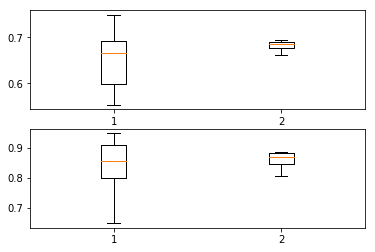

In [55]:
## YOUR CODE
fig, axs = plt.subplots(2)

# Lasso boxplot
lasso_1_rmse = result_df[(result_df['Regularization method'] == 'Lasso') & (result_df['Method idx'] == 1)]['RMSE']
lasso_2_rmse = result_df[(result_df['Regularization method'] == 'Lasso') & (result_df['Method idx'] == 2)]['RMSE']
axs[0].boxplot((lasso_1_rmse, lasso_2_rmse))

# Ridge boxplot
rid_1_rmse = result_df[(result_df['Regularization method'] == 'Ridge') & (result_df['Method idx'] == 1)]['RMSE']
rid_2_rmse = result_df[(result_df['Regularization method'] == 'Ridge') & (result_df['Method idx'] == 2)]['RMSE']
axs[1].boxplot((rid_1_rmse, rid_2_rmse))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f33e2b2f978>,
 'caps': [<matplotlib.lines.Line2D at 0x7f33e2b2ff98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f33e2b2f588>,
 'medians': [<matplotlib.lines.Line2D at 0x7f33e2a886d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f33e2a88a20>,
 'means': []}

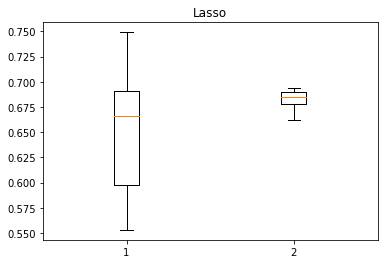

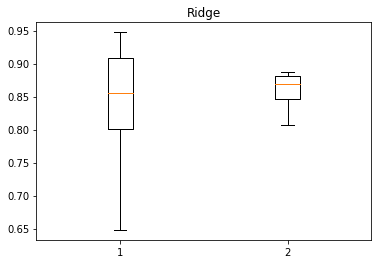

In [56]:
## YOUR CODE

# Lasso boxplot
plt.figure()
lasso_1_rmse = result_df[(result_df['Regularization method'] == 'Lasso') & (result_df['Method idx'] == 1)]['RMSE']
lasso_2_rmse = result_df[(result_df['Regularization method'] == 'Lasso') & (result_df['Method idx'] == 2)]['RMSE']
plt.title('Lasso')
plt.boxplot((lasso_1_rmse, lasso_2_rmse))

# Ridge boxplot
plt.figure()
rid_1_rmse = result_df[(result_df['Regularization method'] == 'Ridge') & (result_df['Method idx'] == 1)]['RMSE']
rid_2_rmse = result_df[(result_df['Regularization method'] == 'Ridge') & (result_df['Method idx'] == 2)]['RMSE']
plt.title('Ridge')
plt.boxplot((rid_1_rmse, rid_2_rmse))

#### <font color='purple'>(d) Comment on why the results look like they do? In general, when tuning parameters, is it better to use one training-validation split or K-fold cross-validation? Why?

**Answer:**

## Task 5. Regularization parameter effect on the coefficients  (1 point)

#### <font color='purple'>(a) The regularization parameter influences the values of the coefficients. Create two plots (one for Ridge and one for Lasso) that have the regularization parameter on the x-axis and coefficient values on the y-axis. You don't have to take all 99 values, you can take for example the first 20. Show each coefficient as a line (on the same plot) and comment on what happens when the regularization parameter increases. </font>

In [134]:
a = 0.1
print(*([a]*5))

0.1 0.1 0.1 0.1 0.1


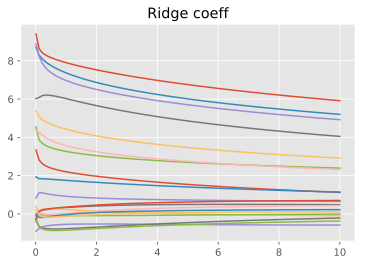

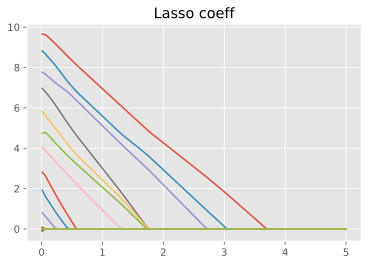

In [138]:
## YOUR CODE
rid_alpha_coeff = {}
for alpha in rid_alphas:
    model = Ridge(alpha=alpha).fit(X_train, y_train)
    rid_alpha_coeff[alpha] = model.coef_[0][:20]
    
x, y = zip(*rid_alpha_coeff.items())
plt.figure()
plt.title('Ridge coeff')
plt.plot(x, y)


lasso_alpha_coeff = {}
for alpha in lasso_alphas:
    model = Lasso(alpha=alpha).fit(X_train, y_train)
    lasso_alpha_coeff[alpha] = model.coef_[:20]
    
x_l, y_l = zip(*lasso_alpha_coeff.items())
plt.figure()
plt.title('Lasso coeff')
plt.plot(x_l, y_l)

#### <font color='purple'>(b) What does Ridge regression do and what does Lasso regression do? How do they differ? </font>

**Answer:**

## Task 6. Evaluating different models  (1 point)

#### <font color='purple'>(a) Choose the values of alpha for Ridge and Lasso according to subtask (4b). Now let's see which model works best for our data by evaluating the test RMSE. Compare the following models by reporting the training and testing set RMSE: </font>

1. Non-regularized linear regression
2. Ridge regression with your chosen parameter
3. Lasso regression with your chosen parameter
4. A "dumb" model that always predicts the mean value of y_train
5. An ideal model that the instructors have used for generating the data (the true coefficients are [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, ..., 0] and intercept 0).

In [198]:
class DumbModel:
    mean = 0
    
    def __init__(self, y):
        self.mean = y.mean()

    def predict(self, samples):
        return len(samples) * [self.mean]

In [234]:
## YOUR CODE
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
dumb_model = DumbModel(y_train)
perf_model = LinearRegression().fit(X_train, y_train)
perf_model.intercept_ = np.asarray(0)
perf_model.coef_ = np.asarray([i for i in range(10, 0, -1)] + [0 for i in range(len(perf_model.coef_[0]) - 10)])

### Evaluate models

In [237]:
#evaluate(regression_model, trainX, trainY, testX, testY, verbose=True):
results = {"RMSE_train": [], "RMSE_test": [], "Model": []}
lr_rmse_tr, lr_rmse_te = evaluate(lr, X_train, y_train, X_test, y_test, False)
results["RMSE_train"].append(lr_rmse_tr[0])
results["RMSE_test"].append(lr_rmse_te[0])
results["Model"].append("Linear")

rid_rmse_tr, rid_rmse_te = evaluate(ridge, X_train, y_train, X_test, y_test, False)
results["RMSE_train"].append(rid_rmse_tr[0])
results["RMSE_test"].append(rid_rmse_te[0])
results["Model"].append("Ridge")

lasso_rmse_tr, lasso_rmse_te = evaluate(lasso, X_train, y_train['y'], X_test, y_test['y'], False)
results["RMSE_train"].append(lasso_rmse_tr)
results["RMSE_test"].append(lasso_rmse_te)
results["Model"].append("Lasso")

d_rmse_tr, d_rmse_te = evaluate(dumb_model, X_train, y_train.values, X_test, y_test.values, False)
results["RMSE_train"].append(d_rmse_tr)
results["RMSE_test"].append(d_rmse_te)
results["Model"].append("DumbModel")

p_rmse_tr, p_rmse_te = evaluate(perf_model, X_train, y_train.values, X_test, y_test.values, False)
results["RMSE_train"].append(p_rmse_tr)
results["RMSE_test"].append(p_rmse_te)
results["Model"].append("PerfModel")

print(results)
results_df = pd.DataFrame(results)
results_df

{'RMSE_train': [2.4079986881087403e-14, 0.042814003134606156, 0.2866537792330127, 11.047120424571311, 15.70697223982737], 'RMSE_test': [7.715131133027678, 2.9259251388747756, 0.8350416258831053, 11.321862747375917, 15.976187534884309], 'Model': ['Linear', 'Ridge', 'Lasso', 'DumbModel', 'PerfModel']}


,RMSE_train,RMSE_test,Model
0,2.407999e-14,7.715131,Linear
1,4.281400e-02,2.925925,Ridge
2,2.866538e-01,0.835042,Lasso
3,1.104712e+01,11.321863,DumbModel
4,1.570697e+01,15.976188,PerfModel


#### <font color='purple'>(b) Which method gives the best results and by looking at which value do you claim that? Why did this method work the best in your opinion?

**Answer:**

#### <font color='purple'>(c) Were all of the "smart" models better than the "dumb" one. What would it mean if the learned model would give worse results?

**Answer:**

#### <font color='purple'>(d) Were the learned models far from the ideal one? Were the learned coefficients similar to the true ones?

**Answer:**

#### <font color='purple'>(e) Which model overfitted the most, how can you see that?

**Answer:**

#### <font color='purple'>(f) Are regularized methods always better than methods without regularization (not only in this case but in general). Why/why not?

**Answer:**

## Optional Bonus Task 7. Dual perceptron (Bonus, 1 point)

#### <font color='purple'> Implement the dual perceptron algorithm. </font>

<img src="dual_perceptron.png" alt="Dual perceptron" style="width: 500px;"/>

**Note:** check `pandas` [manual about indexing data](https://pandas.pydata.org/pandas-docs/stable/indexing.html) and [iterrows documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html), it could be useful

In [ ]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y':y})
data['x0'] = np.ones_like(data['x1']) # Don't forget to create homogeneous coordinates!
data = data[['x0', 'x1', 'x2', 'y']]
data.head()

In [ ]:
def dual_perceptron(data):
    # Your code goes here
    return w

Test your solution:

In [ ]:
w = dual_perceptron(data)
xs= np.linspace(0,8,100)
ys = (-1) * (w[1] / w[2]) * xs - w[0] / w[2]

fig = plt.figure(figsize=(5,5))
plt.plot(x1[y<0], x2[y<0], 'bo')
plt.plot(x1[y>0], x2[y>0], 'ro')
plt.yticks(np.arange(13))
plt.xticks(np.arange(13))
plt.plot(xs, ys, color = "green")

plt.show()